In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.isnull().sum()
#no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df['Attrition'].value_counts(normalize=True)


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

From this we understand that we have a very unbalance dataset skewed towards employees that are not subject to resignation.


We have to take this unbalance into acount when thinking on the metrics to measure our model and our method of sampling (i.e doing oversampling with SMOTE)

# Are employees leaving because they are poorly paid?

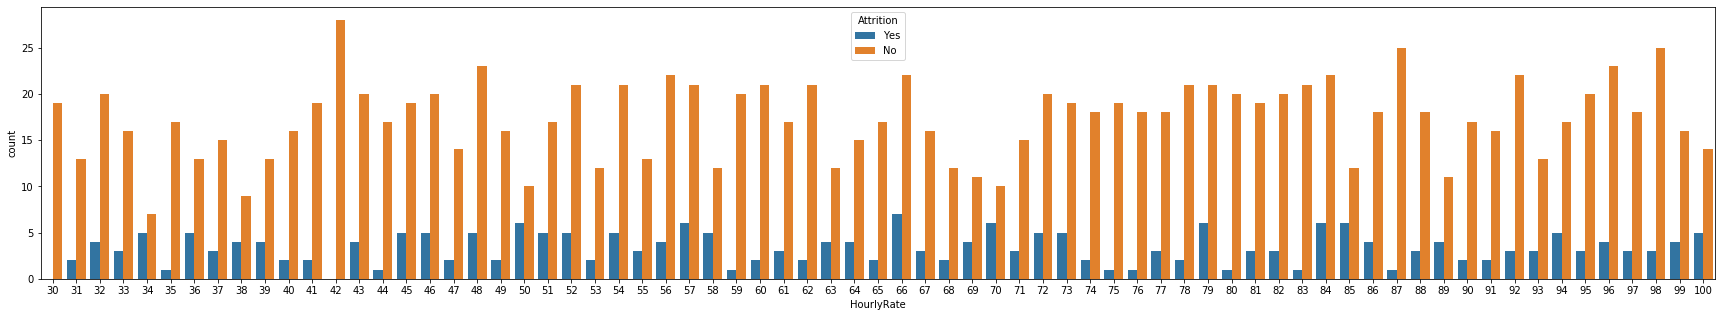

In [20]:
plt.figure(figsize=[30,5])
sns.countplot(x='HourlyRate',data=df,hue='Attrition')
plt.show()

We can observe that there is no direct relationship with more working hours and a higher level of attrition


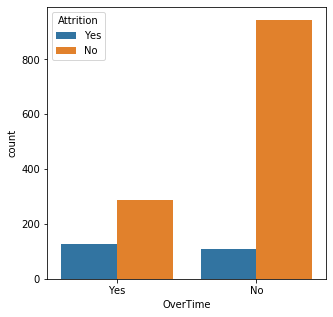

Another quick assumption will be that employees working overtime should be more suceptible to resign,
 however the relationship here is not as direct


In [25]:
plt.figure(figsize=[5,5])
sns.countplot(x='OverTime',data=df,hue='Attrition')
plt.show()
print("Another quick assumption will be that employees working overtime should be more suceptible to resign,\n however the relationship here is not as direct")

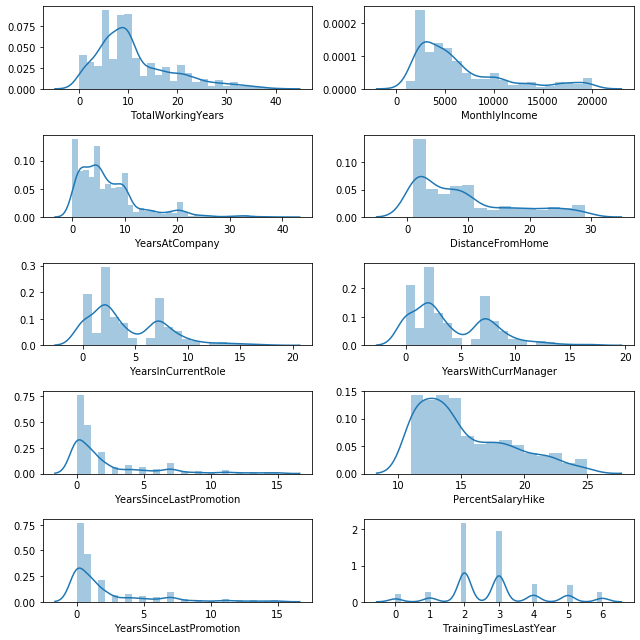

In [7]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

In [8]:
def plot_categorical(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

C:\Users\Mankarov\miniconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Mankarov\miniconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


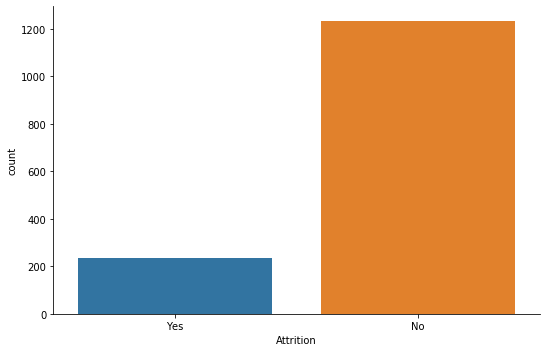

In [9]:
plot_categorical('Attrition')  

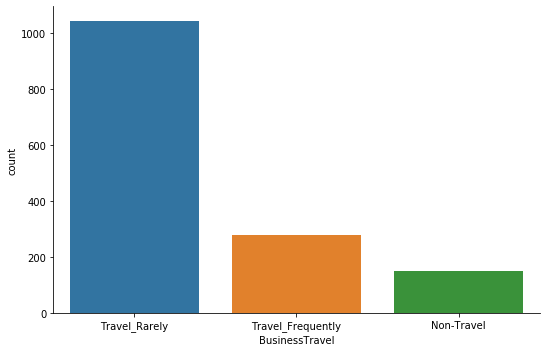

In [10]:
plot_categorical('BusinessTravel')

In [11]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


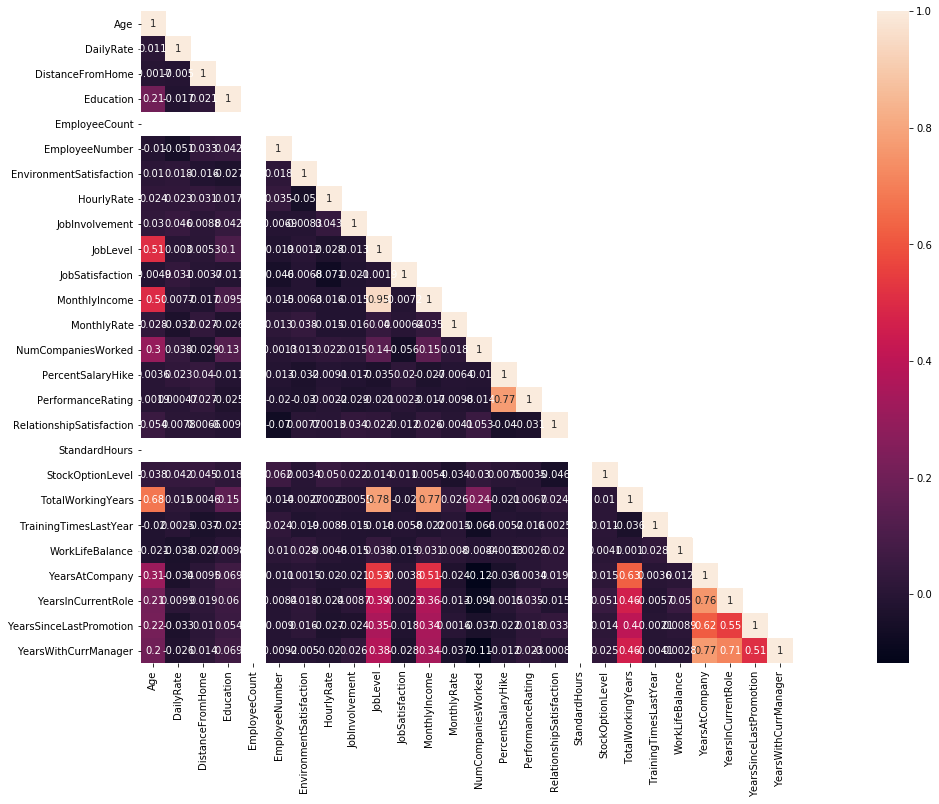

In [12]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [27]:
# Empty list to store columns with categorical data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = df.columns.difference(categorical)

In [28]:
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [29]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [30]:
#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

In [31]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    
    

In [32]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


In [33]:
df.head() # just to verify.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

Scale the training data for a better performance and separate our target variable

In [35]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition']

In [36]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

# ann and dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

Using TensorFlow backend.


In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [40]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train,y_train)

Initialising Random Forest parameters

In [41]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

Having defined our parameters, we can initialise a Random Forest object by using scikit-learn's RandomForestClassifier and unpacking the parameters by adding the double asterisks symbols as follows


In [42]:
rf = RandomForestClassifier(**rf_params)

In [43]:
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [44]:
rf_predictions = rf.predict(x_test)
print("Predictions finished")

Predictions finished


In [45]:
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*80)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.8206521739130435
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       320
           1       0.33      0.35      0.34        48

    accuracy                           0.82       368
   macro avg       0.61      0.62      0.62       368
weighted avg       0.83      0.82      0.82       368



In [46]:
rf.feature_importances_

array([0.04306807, 0.00750409, 0.00566572, 0.01685631, 0.01208723,
       0.00958814, 0.01605377, 0.        , 0.00698055, 0.01864711,
       0.00601176, 0.00632084, 0.02158964, 0.12405097, 0.01851655,
       0.02415287, 0.08256557, 0.04416236, 0.00311527, 0.01578973,
       0.        , 0.17861534, 0.00585208, 0.00062389, 0.00836211,
       0.        , 0.11179312, 0.0390404 , 0.01065077, 0.00925134,
       0.04349664, 0.04871638, 0.00938772, 0.05148367])

In [59]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances=importances.sort_values(by='Gini-importance',ascending=False)


Text(0.5, 1.0, 'Top 10 Features according to Imporance')

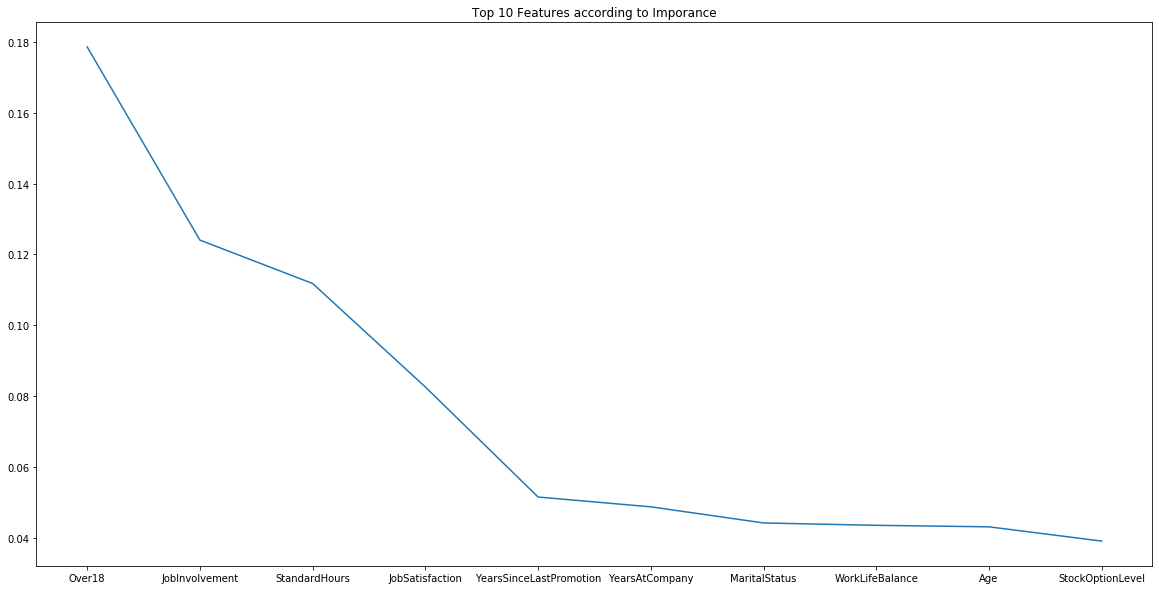

In [72]:
plt.figure(figsize=[20,10])
plt.plot(importances[:10])
plt.title("Top 10 Features according to Imporance")

In [73]:
#Gradient Boosting
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [74]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(x_test)
print("Predictions have finished")

Predictions have finished


In [75]:
print("Accuracy is: ", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

Accuracy is:  0.8913043478260869
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.67      0.33      0.44        48

    accuracy                           0.89       368
   macro avg       0.79      0.65      0.69       368
weighted avg       0.88      0.89      0.88       368



Text(0.5, 1.0, 'Top 10 Features according to Imporance with Gradient Boosting')

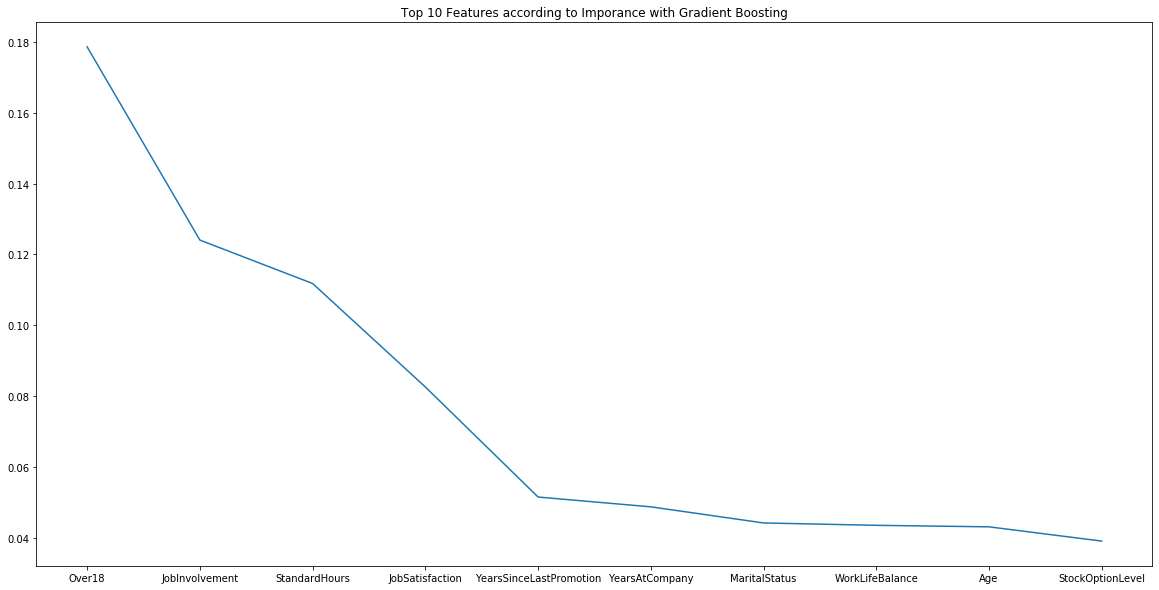

In [79]:
feats_gb = {} # a dict to hold feature_name: feature_importance
for feature, importance_gb in zip(df.columns, gb.feature_importances_):
    feats_gb[feature] = importance_gb #add the name/value pair 

importances_gb = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances_gb=importances.sort_values(by='Gini-importance',ascending=False)
plt.figure(figsize=[20,10])
plt.plot(importances_gb[:10])
plt.title("Top 10 Features according to Imporance with Gradient Boosting")

In [84]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [85]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [90]:
gb_predictions = gb.predict(df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']])

In [91]:
df['predictions']=gb_predictions

In [94]:
df2=pd.read_csv('HR-Employee-Attrition.csv')
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [95]:
df2['predictions']=gb_predictions

In [96]:
df2.to_csv('Attriction_analysis.csv')

# Neural Network Approach

In [97]:
df.shape

(1470, 36)

In [98]:
model=Sequential()
model.add(Dense(input_dim=x_train.shape[1],units=8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
History=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000,verbose=1)

Train on 1102 samples, validate on 368 samples
Epoch 1/1000
1102/1102 [==============================] - 2s 2ms/step - loss: 0.4869 - accuracy: 0.8185 - val_loss: 0.3746 - val_accuracy: 0.8696
Epoch 2/1000
1102/1102 [==============================] - 0s 128us/step - loss: 0.4085 - accuracy: 0.8285 - val_loss: 0.3523 - val_accuracy: 0.8696
Epoch 3/1000
1102/1102 [==============================] - 0s 134us/step - loss: 0.3846 - accuracy: 0.8285 - val_loss: 0.3477 - val_accuracy: 0.8696
Epoch 4/1000
1102/1102 [==============================] - 0s 122us/step - loss: 0.3721 - accuracy: 0.8285 - val_loss: 0.3474 - val_accuracy: 0.8696
Epoch 5/1000
1102/1102 [==============================] - 0s 128us/step - loss: 0.3600 - accuracy: 0.8285 - val_loss: 0.3529 - val_accuracy: 0.8696
Epoch 6/1000
1102/1102 [==============================] - 0s 124us/step - loss: 0.3644 - accuracy: 0.8285 - val_loss: 0.3500 - val_accuracy: 0.8696
Epoch 7/1000
1102/1102 [==============================] - 0s 128us/

Epoch 56/1000
1102/1102 [==============================] - 0s 130us/step - loss: 0.2509 - accuracy: 0.8929 - val_loss: 0.4967 - val_accuracy: 0.8777
Epoch 57/1000
1102/1102 [==============================] - 0s 109us/step - loss: 0.2528 - accuracy: 0.8947 - val_loss: 0.4767 - val_accuracy: 0.8832
Epoch 58/1000
1102/1102 [==============================] - 0s 112us/step - loss: 0.2585 - accuracy: 0.8893 - val_loss: 0.4853 - val_accuracy: 0.8750
Epoch 59/1000
1102/1102 [==============================] - 0s 113us/step - loss: 0.2512 - accuracy: 0.8947 - val_loss: 0.4878 - val_accuracy: 0.8723
Epoch 60/1000
1102/1102 [==============================] - 0s 119us/step - loss: 0.2522 - accuracy: 0.8911 - val_loss: 0.5032 - val_accuracy: 0.8750
Epoch 61/1000
1102/1102 [==============================] - 0s 146us/step - loss: 0.2570 - accuracy: 0.8902 - val_loss: 0.5000 - val_accuracy: 0.8777
Epoch 62/1000
1102/1102 [==============================] - 0s 128us/step - loss: 0.2423 - accuracy: 0.8956

Epoch 111/1000
1102/1102 [==============================] - 0s 115us/step - loss: 0.2075 - accuracy: 0.9138 - val_loss: 0.6366 - val_accuracy: 0.8750
Epoch 112/1000
1102/1102 [==============================] - 0s 108us/step - loss: 0.2310 - accuracy: 0.8993 - val_loss: 0.6119 - val_accuracy: 0.8641
Epoch 113/1000
1102/1102 [==============================] - 0s 112us/step - loss: 0.2245 - accuracy: 0.9083 - val_loss: 0.6104 - val_accuracy: 0.8696
Epoch 114/1000
1102/1102 [==============================] - 0s 106us/step - loss: 0.2265 - accuracy: 0.9011 - val_loss: 0.6505 - val_accuracy: 0.8777
Epoch 115/1000
1102/1102 [==============================] - 0s 109us/step - loss: 0.2217 - accuracy: 0.9038 - val_loss: 0.6250 - val_accuracy: 0.8533
Epoch 116/1000
1102/1102 [==============================] - 0s 114us/step - loss: 0.2087 - accuracy: 0.9192 - val_loss: 0.6746 - val_accuracy: 0.8587
Epoch 117/1000
1102/1102 [==============================] - 0s 109us/step - loss: 0.2165 - accuracy:

1102/1102 [==============================] - 0s 114us/step - loss: 0.2059 - accuracy: 0.9183 - val_loss: 0.8425 - val_accuracy: 0.8696
Epoch 166/1000
1102/1102 [==============================] - 0s 111us/step - loss: 0.2013 - accuracy: 0.9147 - val_loss: 0.8268 - val_accuracy: 0.8641
Epoch 167/1000
1102/1102 [==============================] - 0s 105us/step - loss: 0.2186 - accuracy: 0.9138 - val_loss: 0.7965 - val_accuracy: 0.8750
Epoch 168/1000
1102/1102 [==============================] - 0s 130us/step - loss: 0.2122 - accuracy: 0.9083 - val_loss: 0.7811 - val_accuracy: 0.8696
Epoch 169/1000
1102/1102 [==============================] - 0s 126us/step - loss: 0.2123 - accuracy: 0.9083 - val_loss: 0.8470 - val_accuracy: 0.8696
Epoch 170/1000
1102/1102 [==============================] - 0s 117us/step - loss: 0.1961 - accuracy: 0.9165 - val_loss: 0.8486 - val_accuracy: 0.8641
Epoch 171/1000
1102/1102 [==============================] - 0s 134us/step - loss: 0.2027 - accuracy: 0.9192 - val_l

Epoch 220/1000
1102/1102 [==============================] - 0s 109us/step - loss: 0.1993 - accuracy: 0.9156 - val_loss: 1.1003 - val_accuracy: 0.8533
Epoch 221/1000
1102/1102 [==============================] - 0s 109us/step - loss: 0.1934 - accuracy: 0.9165 - val_loss: 1.1299 - val_accuracy: 0.8723
Epoch 222/1000
1102/1102 [==============================] - 0s 113us/step - loss: 0.2273 - accuracy: 0.9093 - val_loss: 1.0836 - val_accuracy: 0.8641
Epoch 223/1000
1102/1102 [==============================] - 0s 110us/step - loss: 0.1988 - accuracy: 0.9120 - val_loss: 1.0734 - val_accuracy: 0.8614
Epoch 224/1000
1102/1102 [==============================] - 0s 110us/step - loss: 0.1886 - accuracy: 0.9174 - val_loss: 1.0804 - val_accuracy: 0.8641
Epoch 225/1000
1102/1102 [==============================] - 0s 112us/step - loss: 0.1737 - accuracy: 0.9347 - val_loss: 1.1894 - val_accuracy: 0.8723
Epoch 226/1000
1102/1102 [==============================] - 0s 107us/step - loss: 0.1974 - accuracy:

1102/1102 [==============================] - 0s 112us/step - loss: 0.1918 - accuracy: 0.9183 - val_loss: 1.2075 - val_accuracy: 0.8587
Epoch 275/1000
1102/1102 [==============================] - 0s 119us/step - loss: 0.1792 - accuracy: 0.9328 - val_loss: 1.2541 - val_accuracy: 0.8668
Epoch 276/1000
1102/1102 [==============================] - 0s 123us/step - loss: 0.2097 - accuracy: 0.9238 - val_loss: 1.1438 - val_accuracy: 0.8614
Epoch 277/1000
1102/1102 [==============================] - 0s 117us/step - loss: 0.1998 - accuracy: 0.9147 - val_loss: 1.1799 - val_accuracy: 0.8696
Epoch 278/1000
1102/1102 [==============================] - 0s 118us/step - loss: 0.1978 - accuracy: 0.9201 - val_loss: 1.1803 - val_accuracy: 0.8696
Epoch 279/1000
1102/1102 [==============================] - 0s 125us/step - loss: 0.2076 - accuracy: 0.9165 - val_loss: 1.1014 - val_accuracy: 0.8641
Epoch 280/1000
1102/1102 [==============================] - 0s 118us/step - loss: 0.1916 - accuracy: 0.9192 - val_l

Epoch 329/1000
1102/1102 [==============================] - 0s 125us/step - loss: 0.1750 - accuracy: 0.9374 - val_loss: 1.4374 - val_accuracy: 0.8696
Epoch 330/1000
1102/1102 [==============================] - 0s 125us/step - loss: 0.1788 - accuracy: 0.9292 - val_loss: 1.5114 - val_accuracy: 0.8832
Epoch 331/1000
1102/1102 [==============================] - 0s 122us/step - loss: 0.1778 - accuracy: 0.9247 - val_loss: 1.4886 - val_accuracy: 0.8777
Epoch 332/1000
1102/1102 [==============================] - 0s 140us/step - loss: 0.1819 - accuracy: 0.9383 - val_loss: 1.4745 - val_accuracy: 0.8804
Epoch 333/1000
1102/1102 [==============================] - 0s 142us/step - loss: 0.1844 - accuracy: 0.9265 - val_loss: 1.4780 - val_accuracy: 0.8804
Epoch 334/1000
1102/1102 [==============================] - 0s 151us/step - loss: 0.1740 - accuracy: 0.9301 - val_loss: 1.5346 - val_accuracy: 0.8723
Epoch 335/1000
1102/1102 [==============================] - 0s 139us/step - loss: 0.2060 - accuracy:

In [ ]:
model.predict_classes(x_test)
model.predict(x_test)
model.evaluate(x_test,y_test)

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()